# Customer segmentation

##### Librerys

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, silhouette_samples 

##### Data

In [8]:
cluster= pd.read_csv(r'C:\Users\azaze\Desktop\BOOTCAMP\practicas\Cluster_clientes\clusters.csv') #Clusters labels (5)
customers = pd.read_csv(r'C:\Users\azaze\Desktop\BOOTCAMP\practicas\Cluster_clientes\Mall_Customers.csv') #Customers data

#### Understanding the data

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [5]:
customers.Gender.value_counts(normalize =True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [6]:
cluster

,CLUSTER
0,1
1,4
2,1
3,4
4,1
...,...
195,0
196,3
197,0
198,3


### EDA

In [7]:
# Library to hack your EDA 
import pandas_profiling
customers.profile_report()

##### Let's see how variables are related

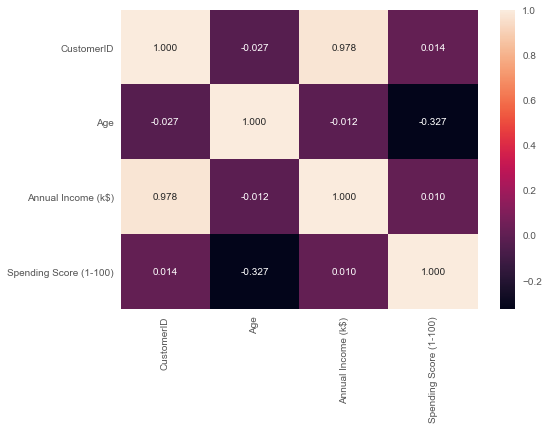

In [8]:
sns.heatmap(customers.corr(),annot=True, fmt = '.3f')
plt.show()

##### Distributions

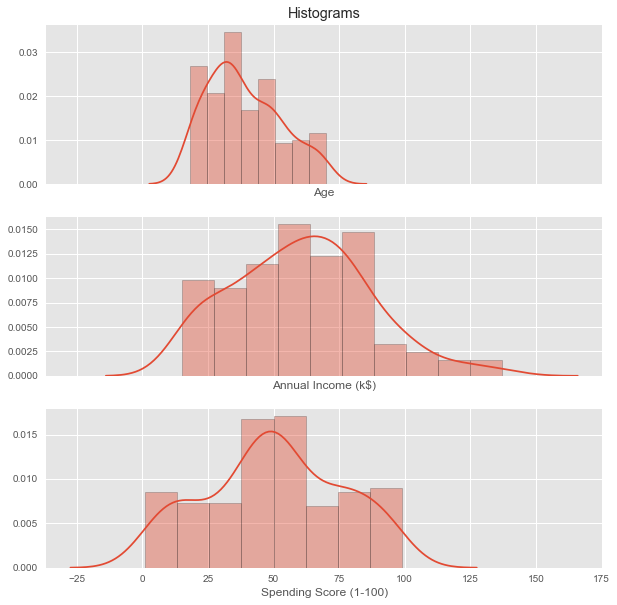

In [9]:
f, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

sns.distplot(customers.Age, ax = ax[0,], hist_kws = {'edgecolor':'black'})
sns.distplot(customers['Annual Income (k$)'], ax = ax[1,], hist_kws = {'edgecolor':'black'})
sns.distplot(customers['Spending Score (1-100)'], ax = ax[2,], hist_kws = {'edgecolor':'black'})
ax[0].set_title('Histograms')
plt.show()

In [10]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

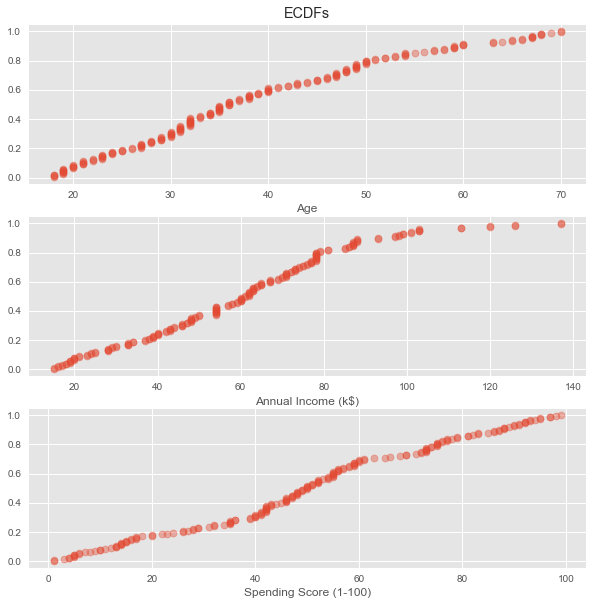

In [11]:
f, ax = plt.subplots(3, 1, figsize=(10, 10))

Age, ECDF = ecdf(customers.Age)
sns.scatterplot(Age, ECDF, edgecolor = None,ax = ax[0,], alpha = 0.4)      

Annual_Income, ECDF = ecdf(customers['Annual Income (k$)'])
sns.scatterplot(Annual_Income, ECDF, edgecolor = None,ax = ax[1,],alpha = 0.4)

Spending_Score, ECDF = ecdf(customers['Spending Score (1-100)'])
sns.scatterplot(Spending_Score, ECDF, edgecolor = None,ax = ax[2,],alpha = 0.4)
ax[0].set_xlabel('Age')
ax[0].set_title('ECDFs')
ax[1].set_xlabel('Annual Income (k$)')
ax[2].set_xlabel('Spending Score (1-100)')
plt.show()

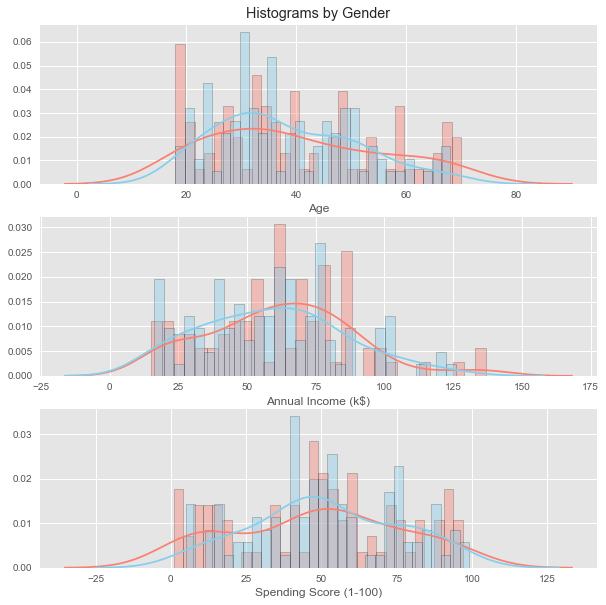

In [12]:
f, ax = plt.subplots(3, 1, figsize=(10, 10))

sns.distplot(customers[customers.Gender =='Male'].Age , ax = ax[0,],color = 'Salmon',
             bins= 30,hist_kws = {'edgecolor':'black'}, label = 'Male')
sns.distplot(customers[customers.Gender =='Female'].Age , ax = ax[0,],color = 'Skyblue',
             bins= 30,hist_kws = {'edgecolor':'black'}, label = 'Female')

sns.distplot(customers[customers.Gender =='Male']['Annual Income (k$)'], ax = ax[1,],color = 'Salmon',
             bins= 30,hist_kws = {'edgecolor':'black'})
sns.distplot(customers[customers.Gender =='Female']['Annual Income (k$)'], ax = ax[1,],color = 'Skyblue',
             bins= 30,hist_kws = {'edgecolor':'black'})

sns.distplot(customers[customers.Gender =='Male']['Spending Score (1-100)'],ax = ax[2,],color = 'Salmon',
             bins= 30,hist_kws = {'edgecolor':'black'})
sns.distplot(customers[customers.Gender =='Female']['Spending Score (1-100)'],ax = ax[2,],color = 'Skyblue',
             bins= 30, hist_kws = {'edgecolor':'black'})
ax[0].set_title('Histograms by Gender')
plt.show()

##### Scatterplots by Gender

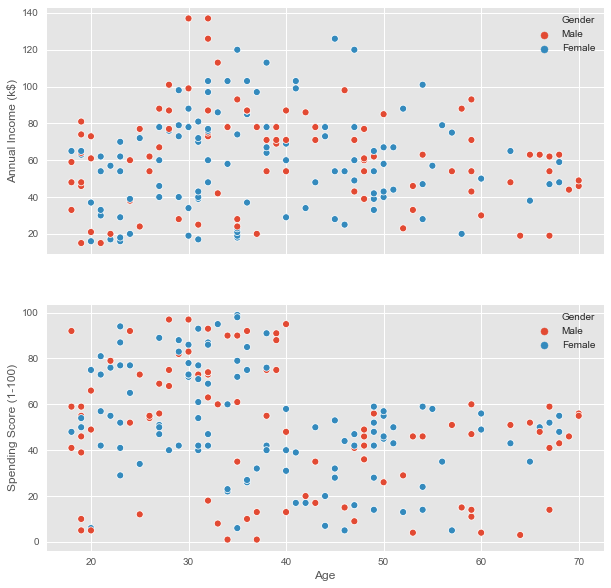

In [13]:
f, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
 
sns.scatterplot(data = customers, x='Age', y = 'Annual Income (k$)', hue = 'Gender', ax = ax[0,] )
sns.scatterplot(data = customers, x='Age', y = 'Spending Score (1-100)', hue = 'Gender', ax = ax[1,])
plt.show()

Young customers look like spend more money

In [14]:
print('Median Spending Score below 40 year' ,customers[customers.Age <= 40]['Spending Score (1-100)'].median()),
print('Median Spending Score above 40 year' ,customers[customers.Age >= 40]['Spending Score (1-100)'].median())

Median Spending Score below 40 year 61.0
Median Spending Score above 40 year 42.0


### Kmeans

In [9]:
X = customers['Annual Income (k$)']
Y = customers['Spending Score (1-100)']
tuples = list(zip(X,Y))
XY = np.array(tuples)

kmeans = KMeans(n_clusters = 5)
kmeans.fit(XY)
y_kmeans = kmeans.fit_predict(XY)

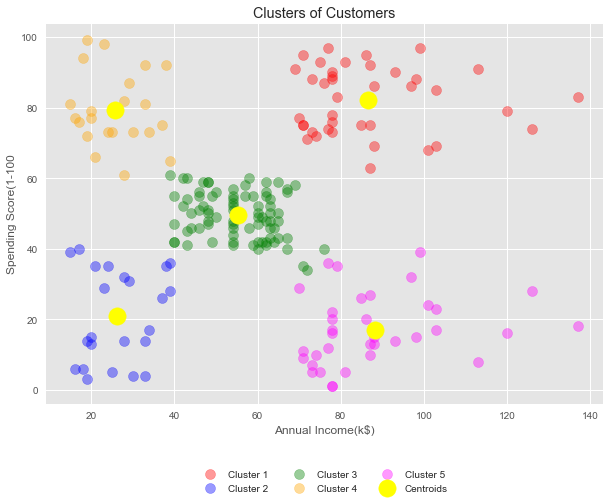

In [16]:
plt.figure(figsize = (10,7))
plt.scatter(XY[y_kmeans==0, 0], XY[y_kmeans==0, 1], s=100, c='red',
            label ='Cluster 1',alpha = 0.4)
plt.scatter(XY[y_kmeans==1, 0], XY[y_kmeans==1, 1], s=100, c='blue',
            label ='Cluster 2', alpha = 0.4)
plt.scatter(XY[y_kmeans==2, 0], XY[y_kmeans==2, 1], s=100, c='green', 
            label ='Cluster 3', alpha = 0.4)
plt.scatter(XY[y_kmeans==3, 0], XY[y_kmeans==3, 1], s=100, c='orange',
            label ='Cluster 4',alpha = 0.4)
plt.scatter(XY[y_kmeans==4, 0], XY[y_kmeans==4, 1], s=100, c='magenta', 
            label ='Cluster 5',alpha = 0.4)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow',
            label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.show()

##### Summary(k=5)

In [17]:
clusters5 = pd.concat([customers.drop('CustomerID',axis = 1) ,pd.Series(kmeans.labels_, name = 'Clusters')]
                      , axis = 1)
percent_count = pd.Series(clusters5.groupby('Clusters')['Age'].count(), name = 'Count') / len(customers)
summary_K5 = clusters5.groupby('Clusters')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
summary_K5['Percent'] = percent_count
summary_K5.rename(columns = {'Annual Income (k$)' :'Mean Annual Income (k$)',
                             'Spending Score (1-100)': 'Mean Spending Score (1-100)'}, inplace = True)
summary_K5

,Mean Annual Income (k$),Mean Spending Score (1-100),Age,Percent
Clusters,,,,
0,86.538462,82.128205,32.692308,0.195
1,26.304348,20.913043,45.217391,0.115
2,55.296296,49.518519,42.716049,0.405
3,25.727273,79.363636,25.272727,0.110
4,88.200000,17.114286,41.114286,0.175


## Models

In [10]:
customers.Gender.replace({'Male':0, 'Female':1}, inplace = True)
cluster=pd.Series(kmeans.labels_, name = 'clusters')
customers['Clusters'] = cluster
customers.drop(['CustomerID', 'Clusters'], axis = 1, inplace =True)

X = np.array(customers)
Y = np.array(cluster)

X_train, X_test, y_train, y_test = train_test_split(
                                X, Y, test_size=0.33, random_state=42)

In [19]:
#-------------------Logistic regression-------------------------
model_rl= LogisticRegression(max_iter = 7000)
model_rl.fit(X_train, y_train)
model_rl.predict(X_test)
acc_rl = model_rl.score(X_test, y_test)

#---------------------Decision tree------------------------------
model_destree = DecisionTreeClassifier()
model_destree.fit(X_train, y_train)
model_destree.predict(X_test)
acc_dt = model_destree.score(X_test, y_test)

#----------------------Random forest----------------------
model_ranforest = RandomForestClassifier()
model_ranforest.fit(X_train, y_train)
model_ranforest.predict(X_test)
acc_rd = model_ranforest.score(X_test,y_test)

#------------------------Naive Bayes-------------------
model_nb= GaussianNB()
model_nb.fit(X_train, y_train)
model_nb.predict(X_test)
acc_nb = model_nb.score(X_test, y_test)

### Models evaluation

In [20]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_rl, acc_rd, acc_nb, 
              acc_dt]})
models.sort_values('Score', ascending=False)

,Model,Score
0,Logistic Regression,0.969697
1,Random Forest,0.969697
2,Naive Bayes,0.969697
3,Decision Tree,0.939394


In [21]:
models_list = [model_rl, model_destree, model_ranforest, model_nb]

for m in models_list:
    print(str(m))
    print(confusion_matrix(y_test, m.predict(X_test), normalize ='true'))
    print('**'*30)

LogisticRegression(max_iter=7000)
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.125      0.875      0.        ]
 [0.         0.         0.07692308 0.         0.92307692]]
************************************************************
DecisionTreeClassifier()
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.03448276 0.         0.89655172 0.         0.06896552]
 [0.         0.         0.125      0.875      0.        ]
 [0.         0.         0.         0.         1.        ]]
************************************************************
RandomForestClassifier()
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.93103448 0.         0.06896552]
 [0.         0.         0.         1. 

We have 3 equal scores, but naive bayes do better by only failing to predict the third cluster 7% of the time

### Evaluation of different K for K-means

##### We are going to use the elbow plot with 2 different metrics

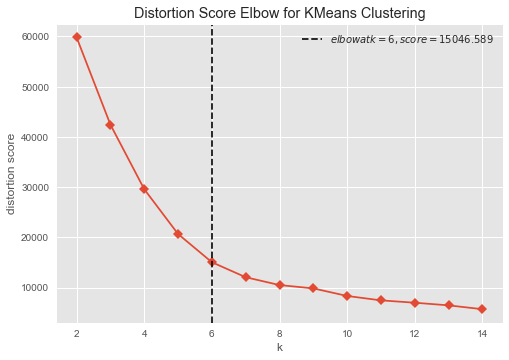

In [22]:
visualizer = KElbowVisualizer(kmeans, k=(2,15),timings=False)
visualizer.fit(X_test)       
visualizer.show()

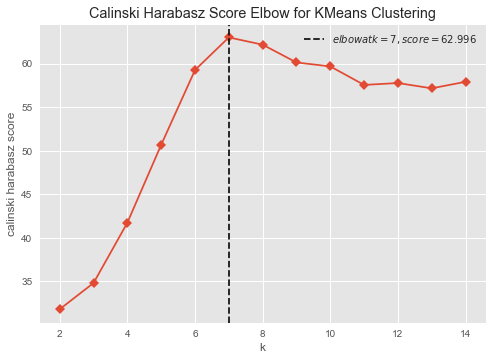

In [23]:
visualizer = KElbowVisualizer(
    kmeans, k=(2,15), metric='calinski_harabasz', timings=False)
visualizer.fit(X_test)
visualizer.show() 

We can see that each metric optimizes K to a different number, 6 and 7. The data is labeled for K = 5.
Something particular about unsupervised learning is that we cannot simply evaluate the model with loss functions or using confusion matrices. For example with K = 5 we obtain more generalized clusters, with K = 6 or K = 7 we generate some more specific clusters. Knowing which K is better depends largely on the purpose of the model. Anyway we can use the silhouette coefficient to know how well the clusters are defined.

#####  K = 7

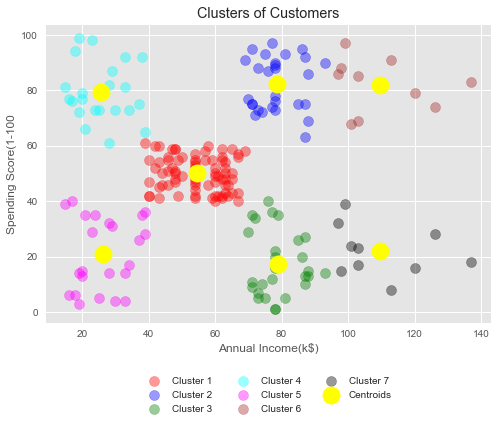

In [28]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(XY)

y_kmeans = kmeans.fit_predict(XY)
kmeans.cluster_centers_
kmeans.labels_

plt.scatter(XY[y_kmeans==0, 0], XY[y_kmeans==0, 1], s=100, c='red',
            label ='Cluster 1',alpha = 0.4)
plt.scatter(XY[y_kmeans==1, 0], XY[y_kmeans==1, 1], s=100, c='blue',
            label ='Cluster 2', alpha = 0.4)
plt.scatter(XY[y_kmeans==2, 0], XY[y_kmeans==2, 1], s=100, c='green', 
            label ='Cluster 3', alpha = 0.4)
plt.scatter(XY[y_kmeans==3, 0], XY[y_kmeans==3, 1], s=100, c='cyan',
            label ='Cluster 4',alpha = 0.4)
plt.scatter(XY[y_kmeans==4, 0], XY[y_kmeans==4, 1], s=100, c='magenta', 
            label ='Cluster 5',alpha = 0.4)
plt.scatter(XY[y_kmeans==5, 0], XY[y_kmeans==5, 1], s=100, c='brown', 
            label ='Cluster 6',alpha = 0.4)
plt.scatter(XY[y_kmeans==6, 0], XY[y_kmeans==6, 1], s=100, c='black', 
            label ='Cluster 7',alpha = 0.4)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow',
            label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.show()

##### Summary(K=7)

In [29]:
clusters7 = pd.concat([customers ,pd.Series(kmeans.labels_, name = 'Clusters')]
                      , axis = 1)
percent_count = pd.Series(clusters7.groupby('Clusters')['Age'].count(), name = 'Count') / len(customers)
summary_K7 = clusters7.groupby('Clusters')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
summary_K7['Percent'] = percent_count
summary_K7.rename(columns = {'Annual Income (k$)' :'Mean Annual Income (k$)',
                             'Spending Score (1-100)': 'Mean Spending Score (1-100)'}, inplace = True)

In [26]:
summary_K5

,Mean Annual Income (k$),Mean Spending Score (1-100),Age,Percent
Clusters,,,,
0,86.538462,82.128205,32.692308,0.195
1,26.304348,20.913043,45.217391,0.115
2,55.296296,49.518519,42.716049,0.405
3,25.727273,79.363636,25.272727,0.110
4,88.200000,17.114286,41.114286,0.175


In [30]:
summary_K7

,Mean Annual Income (k$),Mean Spending Score (1-100),Age,Percent
Clusters,,,,
0,54.615385,50.025641,43.128205,0.390
1,78.551724,82.172414,32.862069,0.145
2,78.892857,17.428571,40.178571,0.140
3,25.727273,79.363636,25.272727,0.110
4,26.304348,20.913043,45.217391,0.115
5,109.700000,82.000000,32.200000,0.050
6,109.700000,22.000000,41.000000,0.050


As we can see in the summaries, 2 clusters remain intact, the cluster to which most of the customers belong varies little, and the 2 new clusters of K = 7, contain only 5% of the customers, with similar Mean Annual Income but with a big difference in Mean Spending Score.

#### Silhouette score

##### Reminder
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
  - 1 Means clusters are well apart from each other and clearly distinguished.
  - 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
  - -1: Means clusters are assigned in the wrong way.

In [136]:
silhouette_scores = pd.DataFrame(columns = ['K', 'silhouette_score'])
Ks = [2,3,4,5,6,7]
for K in Ks:
    clusterer = KMeans(n_clusters = K)
    preds = clusterer.fit_predict(XY)
    score = silhouette_score(XY, preds)
    frame = pd.DataFrame({'K': [K], 'silhouette_score': [score]}) 
    silhouette_scores = pd.concat([silhouette_scores, frame], axis = 0, ignore_index =True) 

In [137]:
silhouette_scores_kmeans = silhouette_scores.sort_values('silhouette_score', ascending=False)
silhouette_scores_kmeans

,K,silhouette_score
3,5,0.553932
4,6,0.539761
5,7,0.531425
2,4,0.493196
1,3,0.467614
0,2,0.296897


### DBSCAN 

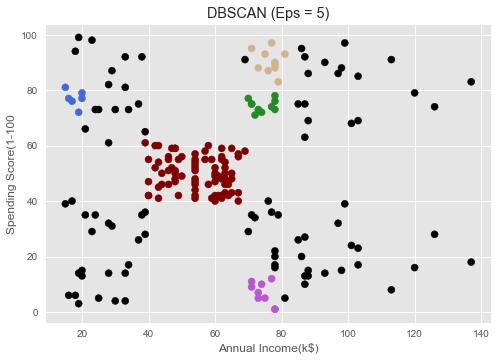

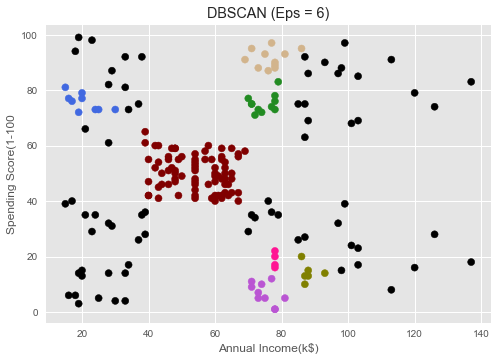

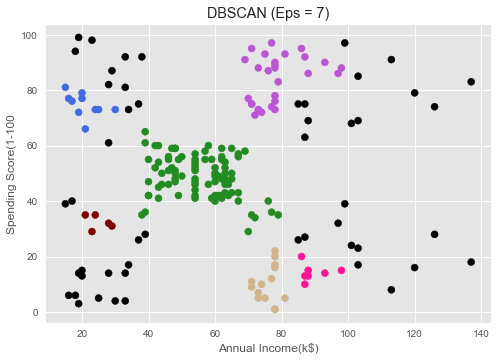

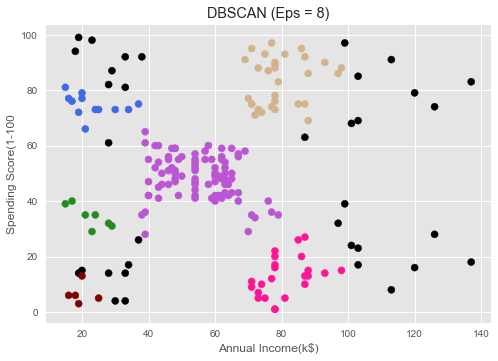

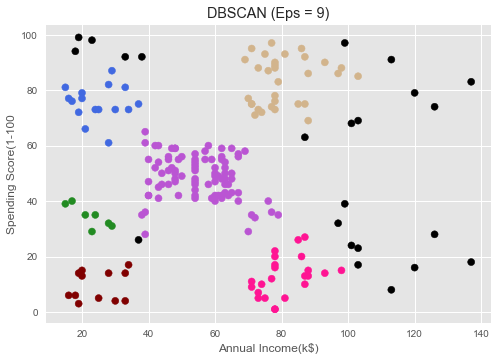

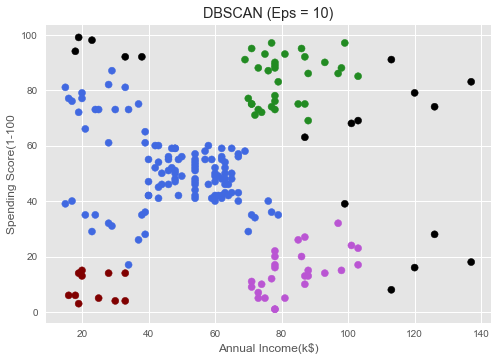

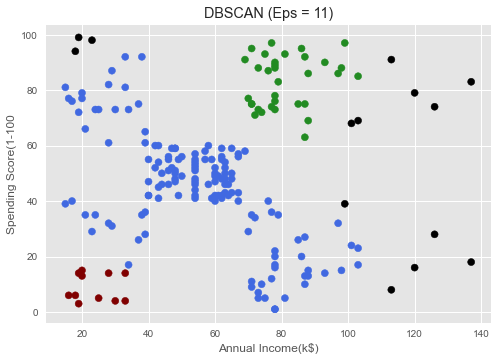

In [20]:
silhouette_scores_DB = pd.DataFrame(columns = ['eps','n_clusters' ,'silhouette_score','n_noise'])
eps_list = np.linspace(5,11,7, dtype='int')
for eps in eps_list:    
    DB = DBSCAN(eps = eps, min_samples= 5)
    DB.fit(XY)
    clusters = DB.labels_
    # Number of clusters, ignoring noise.
    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)
    scores = silhouette_score(XY, clusters)
    frame = pd.DataFrame({'eps':eps, 'n_clusters':n_clusters_, 
                         'silhouette_score': [scores], 'n_noise': [n_noise_]})
    silhouette_scores_DB = pd.concat([silhouette_scores_DB, frame], axis = 0,ignore_index =True)   
    
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 
          'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black'] #Noise points in black
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

    plt.scatter(XY[:,0], XY[:,1], c= vectorizer(clusters))
    plt.title('DBSCAN (Eps = ' + str(eps)+')')
    plt.xlabel('Annual Income(k$)')
    plt.ylabel('Spending Score(1-100')
    plt.show()

In [139]:
silhouette_scores_DB = silhouette_scores_DB.sort_values('silhouette_score', ascending=False)
silhouette_scores_DB

,eps,n_clusters,silhouette_score,n_noise
4,9,6,0.435984,23
5,10,4,0.412492,17
3,8,6,0.355098,35
6,11,3,0.315903,14
2,7,6,0.234123,50
1,6,7,0.173027,70
0,5,5,0.113516,87


### Hierarchical clustering

In [14]:
silhouette_scores_hc = pd.DataFrame(columns=['Linkage', 'Clusters', 'silhouette score'])
n_clusters = [3,5,6,7]
linkage = ['ward', 'complete', 'average', 'single']
for l in linkage:
    for c in n_clusters:
        hc = AgglomerativeClustering(n_clusters = c, affinity = 'euclidean', linkage = l)
        y_hc = hc.fit_predict(XY)
        score = silhouette_score(XY, hc.labels_)
        frame = pd.DataFrame({'Linkage': [l], 'Clusters': [c],'silhouette score':[score]})
        silhouette_scores_hc = pd.concat([silhouette_scores_hc, frame], axis = 0, ignore_index=True)
silhouette_scores_hc = silhouette_scores_hc.sort_values('silhouette score', ascending = False)
silhouette_scores_hc.head(3)

,Linkage,Clusters,silhouette score
1,ward,5,0.552995
5,complete,5,0.552995
6,complete,6,0.543666


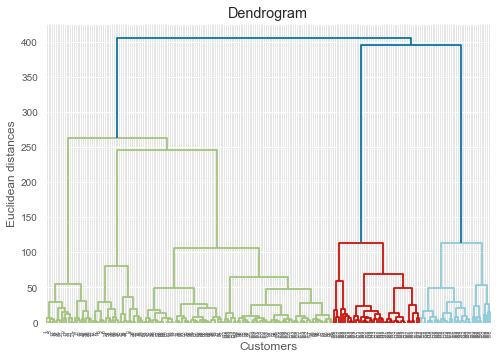

In [123]:
dendrogram = sch.dendrogram(sch.linkage(XY, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

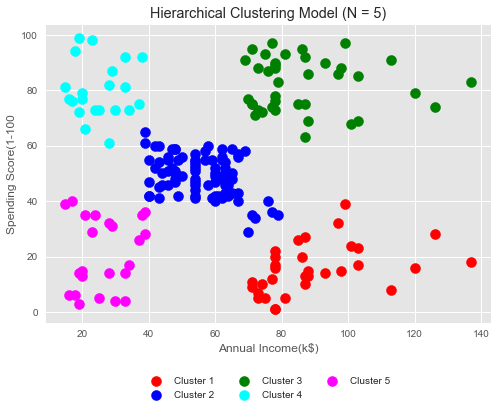

In [13]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(XY)

plt.scatter(XY[y_hc==0, 0], XY[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(XY[y_hc==1, 0], XY[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(XY[y_hc==2, 0], XY[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(XY[y_hc==3, 0], XY[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(XY[y_hc==4, 0], XY[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Hierarchical Clustering Model (N = 5)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.show()


In [12]:
silhouette_scores_hc

,Linkage,Clusters,silhouette score
1,ward,5,0.552995
5,complete,5,0.552995
6,complete,6,0.543666
11,average,7,0.539401
2,ward,6,0.538021
7,complete,7,0.537220
3,ward,7,0.519905
9,average,5,0.479191
8,average,3,0.467614
10,average,6,0.465840


In [144]:
silhouette_scores_DB

,eps,n_clusters,silhouette_score,n_noise
4,9,6,0.435984,23
5,10,4,0.412492,17
3,8,6,0.355098,35
6,11,3,0.315903,14
2,7,6,0.234123,50
1,6,7,0.173027,70
0,5,5,0.113516,87


In [145]:
silhouette_scores_kmeans

,K,silhouette_score
3,5,0.553932
4,6,0.539761
5,7,0.531425
2,4,0.493196
1,3,0.467614
0,2,0.296897


#### Kmeans 3D

In [155]:
silhouette_scores_K3D = pd.DataFrame(columns = ['K', 'silhouette_score'])
Ks = [2,3,4,5,6,7,8,9,10]
for K in Ks:
    clusterer = KMeans(n_clusters = K)
    preds = clusterer.fit_predict(XYZ)
    score = silhouette_score(XYZ, preds)
    frame = pd.DataFrame({'K': [K], 'silhouette_score': [score]}) 
    silhouette_scores_K3D = pd.concat([silhouette_scores_K3D, frame], axis = 0, ignore_index =True)
silhouette_scores_K3D.sort_values('silhouette_score', ascending = False)

,K,silhouette_score
6,8,0.427678
4,6,0.427428
7,9,0.419438
5,7,0.418077
3,5,0.416643
2,4,0.403958
8,10,0.399780
1,3,0.357793
0,2,0.335472


In [158]:
from sklearn.preprocessing import StandardScaler

X = customers['Annual Income (k$)']
Y = customers['Spending Score (1-100)']
Z = customers.Age
Xs = list(zip(X,Y,Z))
XYZ = np.array(Xs)
XYZ = StandardScaler().fit_transform(XYZ)

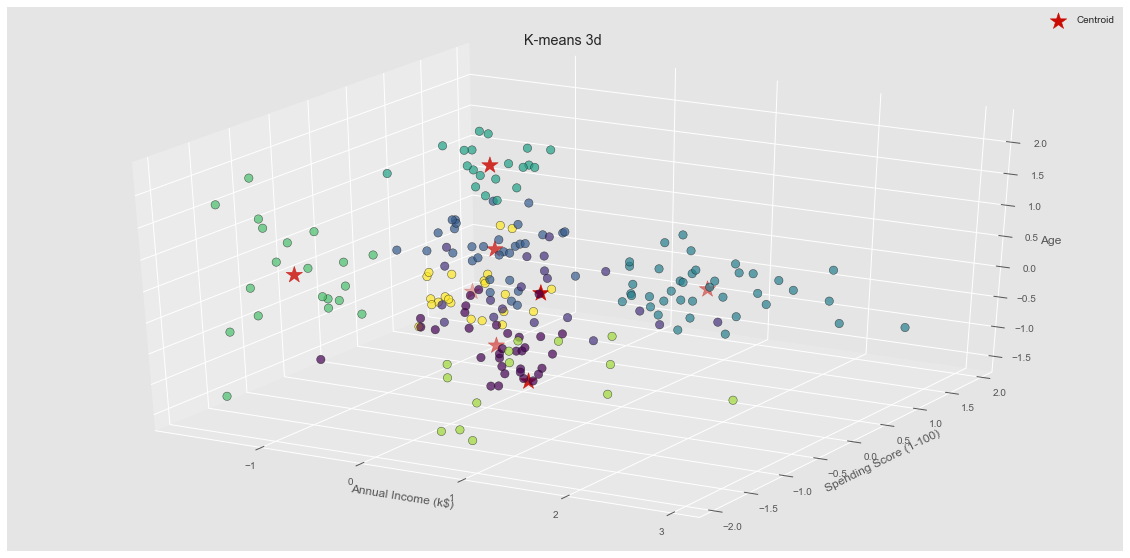

In [160]:
kmeans = KMeans(n_clusters=8, random_state= 33)

y_kmeans = kmeans.fit_predict(XYZ)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2], 
            c=y_kmeans, cmap='viridis',
            edgecolor='k', s=70, alpha = 0.7)

ax.set_title("K-means 3d ")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Age")
ax.dist = 10

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    
plt.legend()
plt.show()